# Netflix Content Analysis

This project explores the Netflix Movies and TV Shows dataset to derive insights about:

- Content type distribution (Movies vs TV Shows)
- Content addition trends over years
- Top genres/categories
- Country-wise content availability
- Movie durations
- TV show seasons

The analysis will help understand Netflix’s content strategy and library composition.


In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot styles for clarity
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

print("Libraries imported successfully.")


Libraries imported successfully.


## Loading the Dataset

The dataset is loaded from the local Downloads folder and previewed to understand its structure and columns.


In [2]:
df = pd.read_csv('/Users/aditya/Downloads/netflix_titles.csv')

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Dataset Overview

We check:

- Number of rows and columns
- Data types of each column
- Missing values


In [4]:
# Checking basic info
df.info()

# Checking missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in 

## Data Cleaning

Before analysis, we will:

- Convert 'date_added' to datetime format
- Handle missing values where relevant
- Prepare duration columns for Movies and TV Shows analysis


In [5]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Strip whitespace from string columns (optional but clean)
str_cols = ['type', 'title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in']
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

print("Data cleaning: date conversion and string trimming completed.")



Data cleaning: date conversion and string trimming completed.


## Content Type Distribution

This analysis shows the distribution of content types on Netflix (Movies vs TV Shows). It helps understand Netflix's content strategy and whether it focuses more on movies or series.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_19452/3596876400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='Set2')


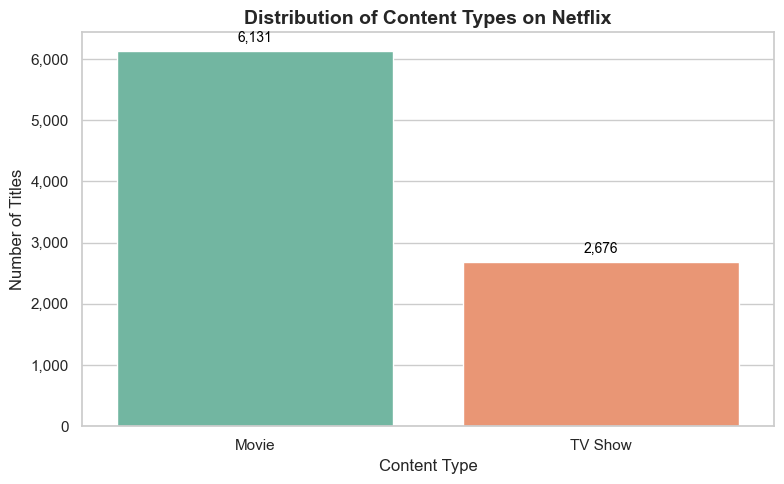

In [ ]:
# Plotting with improved styling

plt.figure(figsize=(8,5))
ax = sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='Set2')

# Title and labels with larger fonts
plt.title("Distribution of Content Types on Netflix", fontsize=14, weight='bold')
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)

# Format y-axis with commas
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adding data labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height + 100),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Content Addition Trend Over Years

This analysis shows how Netflix's content library has grown over the years by analysing the number of movies and TV shows added each year. It provides insights into Netflix's expansion and content acquisition strategies over time.


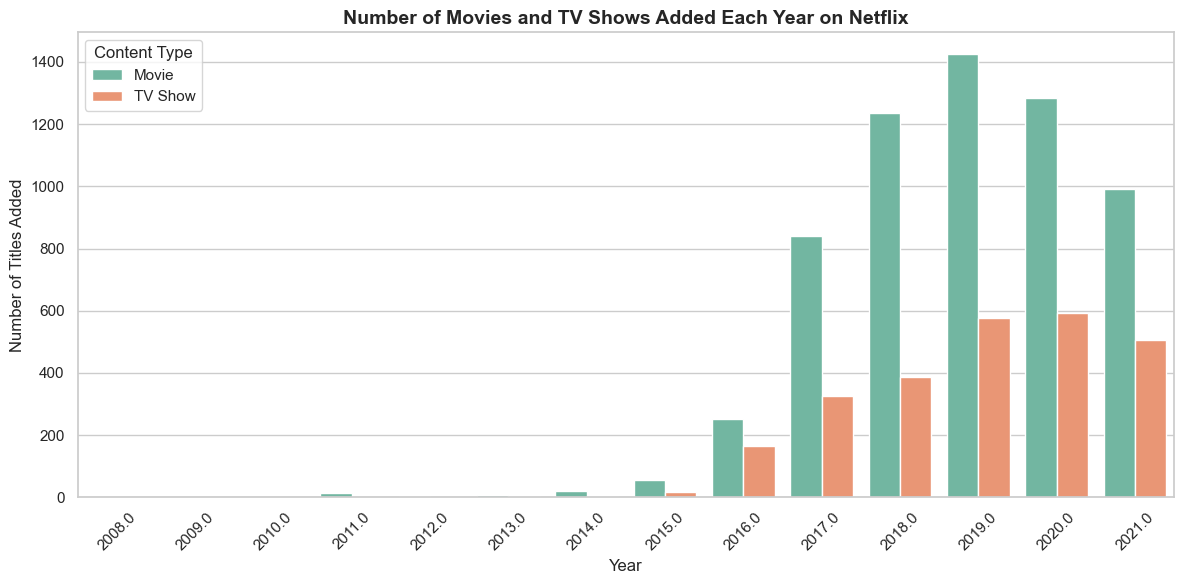

In [8]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Group by year and content type, count number of titles added
content_trend = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Drop rows with missing year (if any)
content_trend = content_trend.dropna()

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='year_added', y='count', hue='type', data=content_trend, palette='Set2')

# Title and labels
plt.title("Number of Movies and TV Shows Added Each Year on Netflix", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.xticks(rotation=45)

# Adding data labels on bars (optional, can clutter if too many years)
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{int(height):,}',
#                 (p.get_x() + p.get_width() / 2, height + 50),
#                 ha='center', va='bottom', fontsize=8, color='black')

plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


## Top Genres/Categories

This analysis identifies the most common genres and categories on Netflix. It helps understand Netflix's content focus areas and popular categories among its global library.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_19452/2215414147.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Genre', data=top_genres, palette='Spectral')


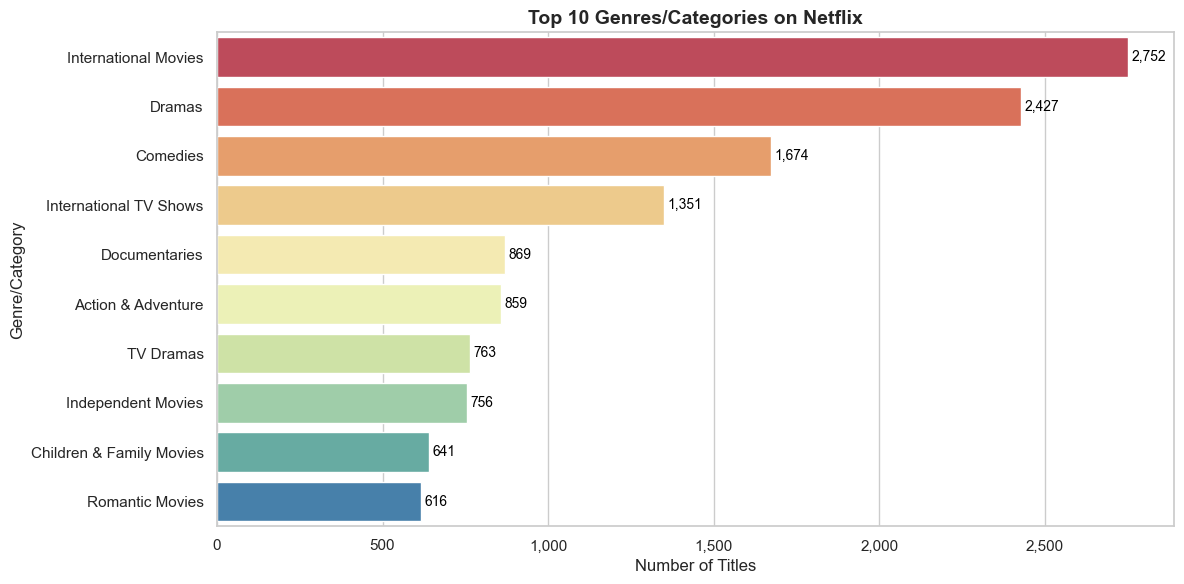

In [9]:
# Split and explode 'listed_in' to separate multiple categories per title
genres_series = df['listed_in'].str.split(',').explode().str.strip()

# Count top 10 genres/categories
top_genres = genres_series.value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Count', y='Genre', data=top_genres, palette='Spectral')

# Title and labels
plt.title("Top 10 Genres/Categories on Netflix", fontsize=14, weight='bold')
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Genre/Category", fontsize=12)

# Format x-axis with commas
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adding data labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width + 10, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Country-wise Content Distribution

This analysis identifies the top countries with the most titles available on Netflix. It provides insights into Netflix's geographic content strategy and regional focus areas.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_19452/2860080206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Country', data=top_countries, palette='viridis')


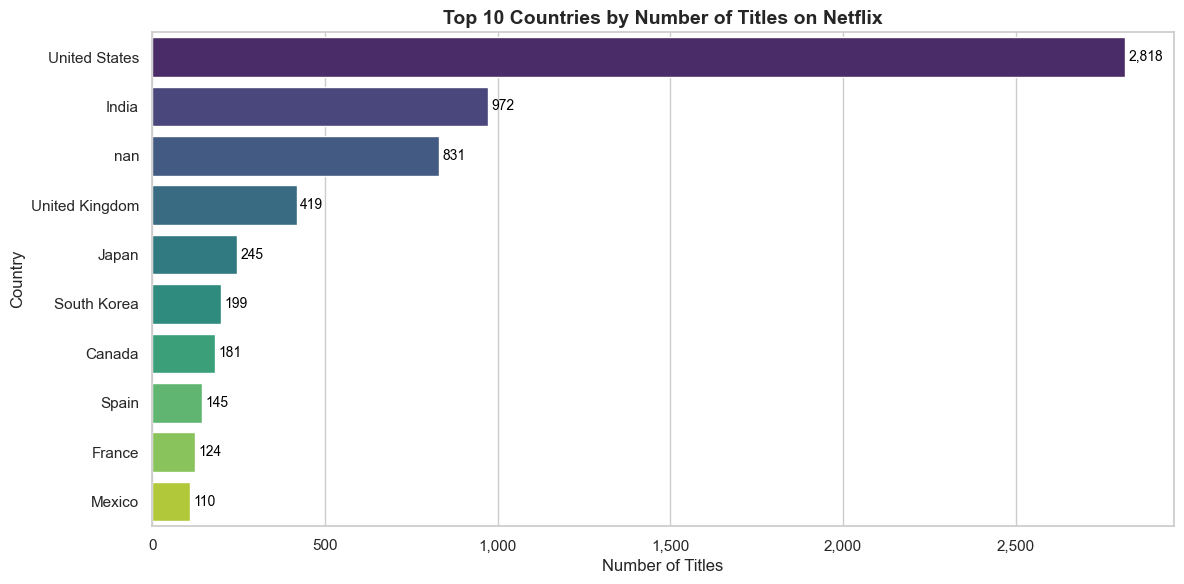

In [10]:
# Count top 10 countries with the most titles
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Count', y='Country', data=top_countries, palette='viridis')

# Title and labels
plt.title("Top 10 Countries by Number of Titles on Netflix", fontsize=14, weight='bold')
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Format x-axis with commas
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adding data labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width + 10, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Movie Duration Distribution

This analysis examines the distribution of movie durations on Netflix. It helps understand typical movie lengths available on the platform.


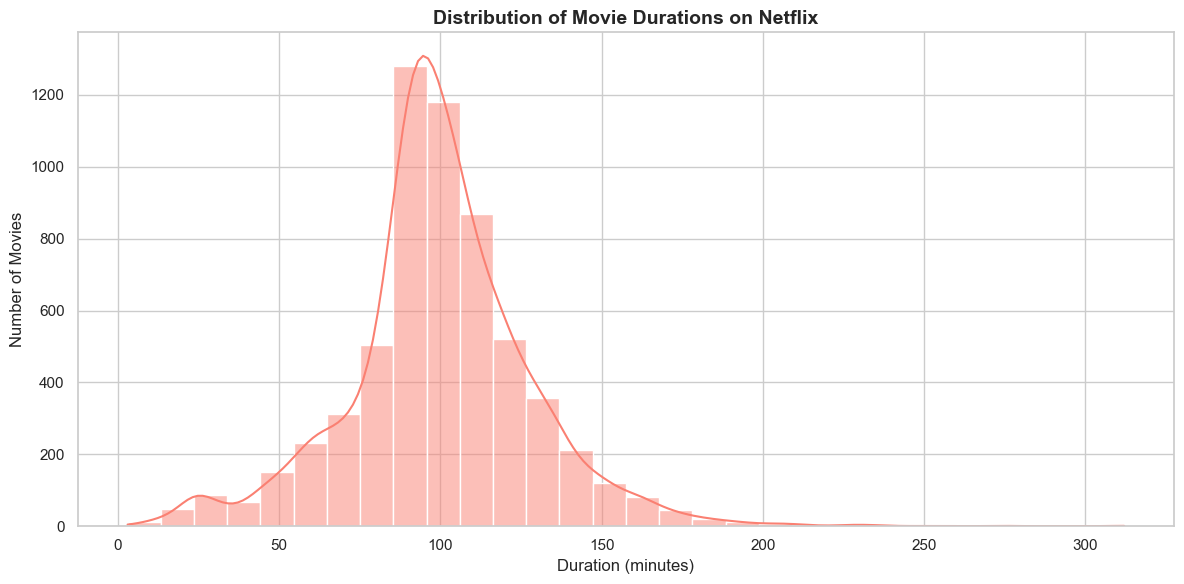

In [11]:
# Filter only Movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract duration in minutes (remove 'min' and convert to numeric)
movies_df['duration_clean'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Drop rows with missing duration values
movies_df = movies_df.dropna(subset=['duration_clean'])

# Plotting
plt.figure(figsize=(12,6))
sns.histplot(movies_df['duration_clean'], bins=30, kde=True, color='salmon')

# Title and labels
plt.title("Distribution of Movie Durations on Netflix", fontsize=14, weight='bold')
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

plt.tight_layout()
plt.show()


## TV Show Season Counts

This analysis examines the distribution of TV show season counts on Netflix. It helps understand how many seasons TV shows typically have on the platform.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_19452/442225378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='seasons_clean', data=tvshows_df, palette='coolwarm')


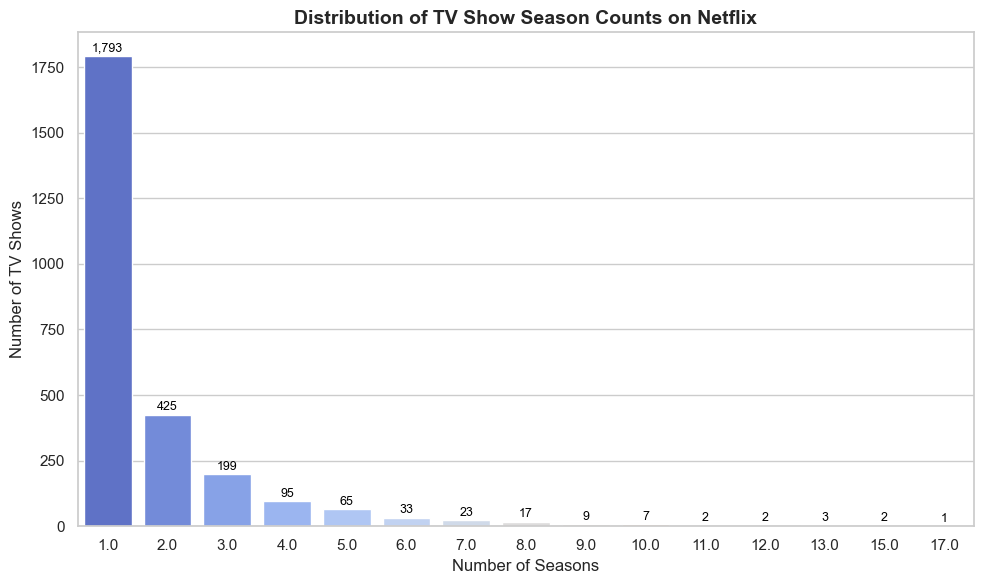

In [12]:
# Filter only TV Shows
tvshows_df = df[df['type'] == 'TV Show'].copy()

# Extract number of seasons (remove 'Season(s)' and convert to numeric)
tvshows_df['seasons_clean'] = tvshows_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)

# Drop rows with missing season values
tvshows_df = tvshows_df.dropna(subset=['seasons_clean'])

# Plotting
plt.figure(figsize=(10,6))
ax = sns.countplot(x='seasons_clean', data=tvshows_df, palette='coolwarm')

# Title and labels
plt.title("Distribution of TV Show Season Counts on Netflix", fontsize=14, weight='bold')
plt.xlabel("Number of Seasons", fontsize=12)
plt.ylabel("Number of TV Shows", fontsize=12)

# Adding data labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height + 5),
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()
